In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
sns.set_theme(style="whitegrid")
import sys
sys.path.append('../scripts/') 
from bias import *
from stats import *

In [2]:
text_df = pd.read_json("../data/arg_write/raw/predictionForUsers.json")
pitches = pd.read_excel('../data/arg_write/raw/2022_pitches.xlsx')
demographics = pd.read_csv("../data/arg_write/raw/220524_F1_finalIDs.csv", index_col=0)
text_df.shape, demographics.shape, pitches.shape

((443, 12), (109, 7), (71, 3))

In [3]:
demographics[demographics.surveyID=='ker16']

,surveyID,c_0001,Age,Gender,Nationality,Nationality_other,Education
57.0,ker16,1,21,2,2,-99,3
118.0,ker16,2,21,2,2,-99,3


In [4]:
# 1: open-ended 2: rewritten
demographics.groupby('c_0001').count()

,surveyID,Age,Gender,Nationality,Nationality_other,Education
c_0001,,,,,,
1,54,54,54,54,54,54
2,55,55,55,55,55,55


In [5]:
pitches

,Text,ID,Gruppe
0,"Sehr geehrte Investoren, ich heiße Max Musterm...",1,CG
1,"Sehr geehrte Investor*innen, wie viele von ihn...",2,CG
2,Erfolgreiches Lernen hängt nicht nur von gutem...,3,CG
3,Wenn Freunde und Bekannte aus dem Arbeitsumfel...,4,CG
4,"Hallo, ich bin Lisa und die Gründerin des Star...",5,CG
...,...,...,...
66,"Guten Tag, ich bin heute hier, um Ihnen meine ...",67,TG2
67,Bearbeiter: Constantin Heinecker (35547860) Da...,68,TG2
68,Unser Unternehmen ist ein Weiterbildung Start ...,69,TG2
69,Wir befinden uns in der Planung für eine App n...,70,TG2


In [6]:
demographics

,surveyID,c_0001,Age,Gender,Nationality,Nationality_other,Education
91.0,ale09,1,21,2,2,-99,3
30.0,Ale47,1,27,1,2,-99,4
108.0,and02,1,24,2,2,-99,3
28.0,ang33,2,23,1,2,-99,3
37.0,ani2,2,20,2,2,-99,3
...,...,...,...,...,...,...,...
112.0,yor10,2,24,1,2,-99,3
85.0,yun12,2,25,1,6,China,4
59.0,ZEL35,1,20,2,2,-99,3
NaN,kat3,2,20,2,2,-99,3


In [7]:
raw_full = pd.merge(text_df[['surveyID', 'normalFeedback', 'time', 'text']], demographics, on="surveyID", how="inner")
raw_full

,surveyID,normalFeedback,time,text,c_0001,Age,Gender,Nationality,Nationality_other,Education
0,sil57,<strong> Generelles Feedback: </strong>\n<ul>\...,1.686127e+09,"Jeder kennt die Hindernisse, die beim Lernen f...",1,24,2,2,-99,3
1,sil57,<strong> Generelles Feedback: </strong>\n<ul>\...,1.686128e+09,"Jeder kennt die Hindernisse, die beim Lernen f...",1,24,2,2,-99,3
2,sil57,<strong>Generelles Feedback:</strong>\n<ul>\n ...,1.686128e+09,Die Vermarktung in diesem Segment soll durch W...,1,24,2,2,-99,3
3,sil57,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.686128e+09,"Jeder kennt die Hindernisse, die beim Lernen f...",1,24,2,2,-99,3
4,sil57,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.686129e+09,Neu ist dabei die Kombination verschiedener Al...,1,24,2,2,-99,3
...,...,...,...,...,...,...,...,...,...,...
311,eli15,"Generelles Feedback:\n- Warum sollten Schulen,...",1.703090e+09,Smart Ed! ist eine innovative Bildungsplattfor...,1,25,2,2,-99,3
312,Sil19,Generelles Feedback:\n<ul>\n <li>Wie könnte m...,1.703089e+09,MotivatedLearning ist eine innovative Lernplat...,1,20,1,2,-99,3
313,hil14,"Sehr geehrte Investoren,\n\nich möchte Ihnen h...",1.703089e+09,"Mein Elevator Pitch:,Guten Tag, lieber Investo...",2,28,1,6,Türkei,3
314,hil14,"Sehr geehrte Investoren,\n\nich freue mich, Ih...",1.703089e+09,"Guten Tag, lieber Investor. Ich möchte Ihnen h...",2,28,1,6,Türkei,3


In [8]:
# check duplicated rows
raw_full[raw_full.normalFeedback.duplicated()]

,surveyID,normalFeedback,time,text,c_0001,Age,Gender,Nationality,Nationality_other,Education
134,ker16,<strong> Generelles Feedback: </strong>\n<ul>\...,1.687173e+09,"„Smart Ed!“ ist eine App, die das Nachhilfewes...",2,21,2,2,-99,3
136,ker16,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.687174e+09,"Smart Ed!“ ist eine App, die das Nachhilfewese...",2,21,2,2,-99,3
138,ker16,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.687174e+09,"„Smart Ed!“ ist eine App, die das Nachhilfewes...",2,21,2,2,-99,3
140,ker16,"'Smart Ed!' ist der Name unseres Start-ups, mi...",1.703089e+09,"Smart Ed!,So nennt sich unser Start,Up, mit de...",2,21,2,2,-99,3
142,ker16,"""Smart Ed!"" ist der revolutionäre Name unseres...",1.703089e+09,"Smart Ed!,So nennt sich unser Start,Up, mit de...",2,21,2,2,-99,3


In [9]:
# drop duplicated rows
raw_full = raw_full.drop_duplicates(subset=['normalFeedback'])
raw_full.rename(columns={'c_0001':'Group'}, inplace=True)
raw_full.groupby('Group').size()
raw_full.shape

/var/folders/b9/7hwy61rs41511yrn274_d5qm0000gn/T/ipykernel_6371/2333183472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_full.rename(columns={'c_0001':'Group'}, inplace=True)


(311, 10)

In [10]:
pitches_cg = pitches[pitches['Gruppe'] == 'CG']
pitches_cg.rename(columns={'Gruppe': 'Group', 'Text': 'text'}, inplace=True)
pitches_cg.drop(columns=['ID'], inplace=True)
pitches_cg

/var/folders/b9/7hwy61rs41511yrn274_d5qm0000gn/T/ipykernel_6371/3175190957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches_cg.rename(columns={'Gruppe': 'Group', 'Text': 'text'}, inplace=True)
/var/folders/b9/7hwy61rs41511yrn274_d5qm0000gn/T/ipykernel_6371/3175190957.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches_cg.drop(columns=['ID'], inplace=True)


,text,Group
0,"Sehr geehrte Investoren, ich heiße Max Musterm...",CG
1,"Sehr geehrte Investor*innen, wie viele von ihn...",CG
2,Erfolgreiches Lernen hängt nicht nur von gutem...,CG
3,Wenn Freunde und Bekannte aus dem Arbeitsumfel...,CG
4,"Hallo, ich bin Lisa und die Gründerin des Star...",CG
5,In meiner App werden die Sinne des Lernenden v...,CG
6,Die Geschäftsmodellidee SmartEd basiert auf de...,CG
7,Ich heiße Martina M. und bin Entwicklerin der ...,CG
8,Ich heiße Mounia Ezzadouy und bin CEO bei Smar...,CG
9,"Wir sind smart Ed! ein junges, motiviertes Sta...",CG


In [11]:
raw_text = pd.concat([raw_full, pitches_cg])
raw_text

,surveyID,normalFeedback,time,text,Group,Age,Gender,Nationality,Nationality_other,Education
0,sil57,<strong> Generelles Feedback: </strong>\n<ul>\...,1.686127e+09,"Jeder kennt die Hindernisse, die beim Lernen f...",1,24.0,2.0,2.0,-99,3.0
1,sil57,<strong> Generelles Feedback: </strong>\n<ul>\...,1.686128e+09,"Jeder kennt die Hindernisse, die beim Lernen f...",1,24.0,2.0,2.0,-99,3.0
2,sil57,<strong>Generelles Feedback:</strong>\n<ul>\n ...,1.686128e+09,Die Vermarktung in diesem Segment soll durch W...,1,24.0,2.0,2.0,-99,3.0
3,sil57,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.686128e+09,"Jeder kennt die Hindernisse, die beim Lernen f...",1,24.0,2.0,2.0,-99,3.0
4,sil57,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.686129e+09,Neu ist dabei die Kombination verschiedener Al...,1,24.0,2.0,2.0,-99,3.0
...,...,...,...,...,...,...,...,...,...,...
16,NaN,NaN,NaN,Ein großer Nachteil von bisherigen Systemen zu...,CG,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,Die Nachhilfeapp ‘’Smart Ed’’ bietet für Stude...,CG,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,"Hallo, Ich bin Sabrina Weinberger und die Grün...",CG,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,"Guten Tag Herr Investor, Ich arbeite gerade an...",CG,NaN,NaN,NaN,NaN,NaN


In [12]:
text = clean_calc_bias(raw_text, 'text')
# text.to_csv("../data/arg_write/text.csv", index=False)
feedback = clean_calc_bias(raw_full.copy(), 'normalFeedback')
# feedback.to_csv("../data/arg_write/feedback.csv", index=False)
text.shape, feedback.shape, text.surveyID.nunique(), feedback.surveyID.nunique()

/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:45: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 45 of the file /Users/su/Desktop/writing bias/notebooks/../scripts/bias.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  sentences = BeautifulSoup(text).get_text(" ")
/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:45: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  sentences = BeautifulSoup(text).get_text(" ")
/Users/su/Desktop/writing bias/notebooks/../scripts/bias.py:45: GuessedAtParserWarning: No

((332, 19), (311, 19), 108, 108)

In [13]:
text.groupby('Group').size()

Group
1     192
2     119
CG     21
dtype: int64

In [14]:
feedback.groupby('Group').size()

Group
1    192
2    119
dtype: int64

In [15]:
processed_full = pd.concat([text, feedback])
processed_full.isna().sum()

surveyID                 21
normalFeedback           21
time                     21
text                      0
Group                     0
Age                      21
Gender                   21
Nationality              21
Nationality_other        21
Education                21
text_clean              311
word_gender               0
word_dict                 0
total_words               0
total_unique_words        0
total_m_cooc              0
total_f_cooc              0
bias_records              0
bias_score                0
normalFeedback_clean    332
dtype: int64

In [16]:
text.surveyID.nunique(), feedback.surveyID.nunique(), processed_full.surveyID.nunique()

(108, 108, 108)

In [17]:
set(processed_full[processed_full.Group=='G1: Feedback'].surveyID).intersection(set(processed_full[processed_full.Group=='G2: Rewritten'].surveyID))

set()

In [39]:
processed_full[processed_full.surveyID=='ker16']

,surveyID,normalFeedback,time,text,Group,Age,Gender,Nationality,Nationality_other,Education,text_clean,word_gender,word_dict,total_words,total_unique_words,total_m_cooc,total_f_cooc,bias_records,bias_score,normalFeedback_clean
133,ker16,<strong> Generelles Feedback: </strong>\n<ul>\...,1.687173e+09,"„Smart Ed!“ ist eine App, die das Nachhilfewes...",1,21.0,2.0,2.0,-99,3.0,Smart Ed App Nachhilfewesen Kopf stellt Durch ...,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'Smart': 3, 'Ed': 3, 'App': 8, 'Nachhilfewese...",167,132,19.000132,76.000132,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...",-1.3674,NaN
135,ker16,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.687174e+09,"Smart Ed!“ ist eine App, die das Nachhilfewese...",1,21.0,2.0,2.0,-99,3.0,Smart Ed App Nachhilfewesen Kopf stellt Durch ...,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'Smart': 4, 'Ed': 4, 'App': 10, 'Nachhilfewes...",193,154,19.000154,76.000154,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...",-0.9740,NaN
137,ker16,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.687174e+09,"„Smart Ed!“ ist eine App, die das Nachhilfewes...",1,21.0,2.0,2.0,-99,3.0,Smart Ed App Nachhilfewesen Kopf stellt Durch ...,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'Smart': 4, 'Ed': 4, 'App': 10, 'Nachhilfewes...",193,154,19.000154,76.000154,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...",-0.9740,NaN
139,ker16,"'Smart Ed!' ist der Name unseres Start-ups, mi...",1.703089e+09,"Smart Ed!,So nennt sich unser Start,Up, mit de...",1,21.0,2.0,2.0,-99,3.0,Smart EdSo nennt StartUp Nachhilfemarkt revolu...,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'Smart': 1, 'EdSo': 1, 'nennt': 1, 'StartUp':...",169,150,0.000150,19.000150,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...",9.9991,NaN
141,ker16,"""Smart Ed!"" ist der revolutionäre Name unseres...",1.703089e+09,"Smart Ed!,So nennt sich unser Start,Up, mit de...",1,21.0,2.0,2.0,-99,3.0,Smart EdSo nennt StartUp Nachhilfemarkt revolu...,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'Smart': 1, 'EdSo': 1, 'nennt': 1, 'StartUp':...",191,169,0.000169,38.000169,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...",9.3720,NaN
133,ker16,<strong> Generelles Feedback: </strong>\n<ul>\...,1.687173e+09,"„Smart Ed!“ ist eine App, die das Nachhilfewes...",1,21.0,2.0,2.0,-99,3.0,NaN,"{'Generelles': {'m': 1e-06, 'f': 1e-06, 'femal...","{'Generelles': 1, 'Feedback': 2, 'Wie': 3, 'Ap...",100,82,0.000082,19.000082,"{'Generelles': {'m': 1e-06, 'f': 1e-06, 'femal...",9.3120,Generelles Feedback Wie AppKonzept besser aktu...
135,ker16,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.687174e+09,"Smart Ed!“ ist eine App, die das Nachhilfewese...",1,21.0,2.0,2.0,-99,3.0,NaN,"{'Generelles': {'m': 1e-06, 'f': 1e-06, 'femal...","{'Generelles': 1, 'Feedback': 2, 'Wie': 3, 'Ar...",92,68,19.000068,19.000068,"{'Generelles': {'m': 1e-06, 'f': 1e-06, 'femal...",0.3860,Generelles Feedback Wie Argument Einzigartigke...
137,ker16,<strong>Generelles Feedback:</strong>\n<ul>\n<...,1.687174e+09,"„Smart Ed!“ ist eine App, die das Nachhilfewes...",1,21.0,2.0,2.0,-99,3.0,NaN,"{'Generelles': {'m': 1e-06, 'f': 1e-06, 'femal...","{'Generelles': 1, 'Feedback': 2, 'Wie': 2, 'Vo...",94,78,0.000078,0.000078,"{'Generelles': {'m': 1e-06, 'f': 1e-06, 'femal...",0.0000,Generelles Feedback Wie Vorteile App deutliche...
139,ker16,"'Smart Ed!' ist der Name unseres Start-ups, mi...",1.703089e+09,"Smart Ed!,So nennt sich unser Start,Up, mit de...",1,21.0,2.0,2.0,-99,3.0,NaN,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'Smart': 1, 'Ed': 1, 'Name': 1, 'Startups': 1...",235,188,0.000188,200.000188,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...",6.1045,Smart Ed Name Startups Revolution Nachhilfemar...
141,ker16,"""Smart Ed!"" ist der revolutionäre Name unseres...",1.703089e+09,"Smart Ed!,So nennt sich unser Start,Up, mit de...",1,21.0,2.0,2.0,-99,3.0,NaN,"{'Smart': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'Smart': 1, 'Ed': 1, 'rev

In [40]:
processed_full.to_csv("../data/arg_write/gpt_full.csv", index=False)

In [41]:
processed_full = pd.read_csv("../data/arg_write/gpt_full.csv")
processed_full.shape, processed_full.surveyID.nunique()

((643, 20), 108)

In [42]:
text.Group.unique()

array([1, 2, 'CG'], dtype=object)

In [43]:
# write processed_full.text_clean to a txt file with each row as a line
text[text.Group=='CG'].text_clean.to_csv("../data/arg_write/text_input/gpt_text_cg.txt", index=False, header=False)
text[text.Group=='G1: Feedback'].text_clean.to_csv("../data/arg_write/text_input/gpt_text_g1.txt", index=False, header=False)
text[text.Group=='G2: Rewritten'].text_clean.to_csv("../data/arg_write/text_input/gpt_text_g2.txt", index=False, header=False)
feedback[feedback.Group=='G1: Feedback'].normalFeedback_clean.to_csv("../data/arg_write/text_input/gpt_feedback_g1.txt", index=False, header=False)
feedback[feedback.Group=='G2: Rewritten'].normalFeedback_clean.to_csv("../data/arg_write/text_input/gpt_feedback_g2.txt", index=False, header=False)

In [44]:
import re
from collections import Counter
def preprocess(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = text.split()  # Tokenize
    return tokens

# Preprocess each document in the corpus
tokens_list = [preprocess(doc) for doc in text.text_clean]
# Flatten the list of tokens and count frequencies
all_tokens = [token for sublist in tokens_list for token in sublist]
word_counts = Counter(all_tokens)

# Filter words based on minimum frequency threshold (e.g., 1)
min_freq = 1
vocabulary = {word: freq for word, freq in word_counts.items() if freq >= min_freq}

In [45]:
# Create the vocabulary file
with open('../data/arg_write/text_input/text_vocab.txt', 'w') as vocab_file:
    for word, freq in vocabulary.items():
        vocab_file.write(f'{word} {freq}\n')

In [46]:
tokens_list = [preprocess(doc) for doc in feedback.normalFeedback_clean]
# Flatten the list of tokens and count frequencies
all_tokens = [token for sublist in tokens_list for token in sublist]
word_counts = Counter(all_tokens)

# Filter words based on minimum frequency threshold (e.g., 1)
min_freq = 1
vocabulary = {word: freq for word, freq in word_counts.items() if freq >= min_freq}
# Create the vocabulary file
with open('../data/arg_write/text_input/feedback_vocab.txt', 'w') as vocab_file:
    for word, freq in vocabulary.items():
        vocab_file.write(f'{word} {freq}\n')

# WEAT COOC

In [47]:
!python -m spacy download de_core_news_sm

python(5072) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


^C
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/su/anaconda3/lib/python3.11/site-packages/pip/__main__.py", line 22, in <module>
    from pip._internal.cli.main import main as _main
  File "/Users/su/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/Users/su/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/Users/su/anaconda3/lib/python3.11/site-packages/pip/_internal/cli/main_parser.py", line 5, in <module>
    import subprocess
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<f

In [ ]:
!python weat_de_cooc.py \
    --data "/Users/su/Desktop/writing bias/data/arg_write/text_input/gpt_text_cg.txt" \
    --output "/Users/su/Desktop/writing bias/output/weat" \
    --processing_cores 7 \
    --tests 1 2 3 4 5 6 7 8 9 10

Please make sure that your input texts are whitespace separated tokens. The script might not work correctly otherwise.
Generating target-association test pairs...
Extracting candidate posts...
100%|█████████████████████████████████████| 7557/7557 [00:04<00:00, 1806.38it/s]
Splitting candidate posts into sentences...
0it [00:00, ?it/s]
Calculating sentence-based cooccurrences...
7557it [00:01, 4881.71it/s]
Unpacking cooccurrences into a more useful format...
Exporting results to disk at /Users/su/Desktop/writing bias/output/weat/weat-cooccurrence-analysis_results-20240610114921.json.
Done.


In [ ]:
!python weat_de_cooc.py \
    --data "/Users/su/Desktop/writing bias/data/arg_write/text_input/gpt_text_g1.txt" \
    --output "/Users/su/Desktop/writing bias/output/weat" \
    --processing_cores 7 \
    --tests 1 2 3 4 5 6 7 8 9 10

Please make sure that your input texts are whitespace separated tokens. The script might not work correctly otherwise.
Generating target-association test pairs...
Extracting candidate posts...
100%|█████████████████████████████████████| 7557/7557 [00:05<00:00, 1432.41it/s]
Splitting candidate posts into sentences...
0it [00:00, ?it/s]
Calculating sentence-based cooccurrences...
7557it [00:01, 4110.94it/s]
Unpacking cooccurrences into a more useful format...
Exporting results to disk at /Users/su/Desktop/writing bias/output/weat/weat-cooccurrence-analysis_results-20240610114820.json.
Done.


In [ ]:
!python weat_de_cooc.py \
    --data "/Users/su/Desktop/writing bias/data/arg_write/text_input/gpt_text_g2.txt" \
    --output "/Users/su/Desktop/writing bias/output/weat" \
    --processing_cores 7 \
    --tests 1 2 3 4 5 6 7 8 9 10

Please make sure that your input texts are whitespace separated tokens. The script might not work correctly otherwise.
Generating target-association test pairs...
Extracting candidate posts...
100%|█████████████████████████████████████| 7557/7557 [00:03<00:00, 1971.74it/s]
Splitting candidate posts into sentences...
0it [00:00, ?it/s]
Calculating sentence-based cooccurrences...
7557it [00:04, 1665.90it/s]
Unpacking cooccurrences into a more useful format...
Exporting results to disk at /Users/su/Desktop/writing bias/output/weat/weat-cooccurrence-analysis_results-20240610114852.json.
Done.


In [ ]:
!python weat_de_cooc.py \
    --data "/Users/su/Desktop/writing bias/data/arg_write/text_input/gpt_feedback_g1.txt" \
    --output "/Users/su/Desktop/writing bias/output/weat" \
    --processing_cores 7 \
    --tests 1 2 3 4 5 6 7 8 9 10

Please make sure that your input texts are whitespace separated tokens. The script might not work correctly otherwise.
Generating target-association test pairs...
Extracting candidate posts...
100%|█████████████████████████████████████| 7557/7557 [00:05<00:00, 1475.36it/s]
Splitting candidate posts into sentences...
0it [00:00, ?it/s]
Calculating sentence-based cooccurrences...
7557it [00:01, 4677.31it/s]
Unpacking cooccurrences into a more useful format...
Exporting results to disk at /Users/su/Desktop/writing bias/output/weat/weat-cooccurrence-analysis_results-20240610114950.json.
Done.


In [ ]:
!python weat_de_cooc.py \
    --data "/Users/su/Desktop/writing bias/data/arg_write/text_input/gpt_feedback_g2.txt" \
    --output "/Users/su/Desktop/writing bias/output/weat" \
    --processing_cores 7 \
    --tests 1 2 3 4 5 6 7 8 9 10

Please make sure that your input texts are whitespace separated tokens. The script might not work correctly otherwise.
Generating target-association test pairs...
Extracting candidate posts...
100%|█████████████████████████████████████| 7557/7557 [00:04<00:00, 1554.58it/s]
Splitting candidate posts into sentences...
0it [00:00, ?it/s]
Calculating sentence-based cooccurrences...
7557it [00:01, 4085.33it/s]
Unpacking cooccurrences into a more useful format...
Exporting results to disk at /Users/su/Desktop/writing bias/output/weat/weat-cooccurrence-analysis_results-20240610115018.json.
Done.


# GenBit COOC

In [ ]:
processed_text = processed_full[processed_full.text_clean.notna()]
processed_feedback = processed_full[processed_full.normalFeedback_clean.notna()]
processed_text.shape, processed_feedback.shape

In [ ]:
processed_text.groupby('Group').size()

Group
CG                21
G1: Feedback     184
G2: Rewritten    127
dtype: int64

In [ ]:
processed_feedback.bias_score.describe()

count    311.000000
mean       3.638477
std        5.206620
min      -10.100900
25%        0.000000
50%        5.719000
75%        8.558800
max       10.243200
Name: bias_score, dtype: float64

In [ ]:
processed_text.bias_score.describe()

count    332.000000
mean       2.031401
std        6.123057
min      -10.192000
25%       -0.241400
50%        0.000000
75%        8.571000
max       10.216700
Name: bias_score, dtype: float64

## text

In [13]:
cg = text[text.Group=='CG']
tg1 = text[text.Group=='G1: Feedback']
tg2 = text[text.Group=='G2: Rewritten']
cg.shape, tg1.shape, tg2.shape

((21, 19), (0, 19), (0, 19))

In [14]:
tg1_first = tg1.sort_values('time').drop_duplicates('surveyID', keep='first')
tg2_first = tg2.sort_values('time').drop_duplicates('surveyID', keep='first')
tg_first = pd.concat([tg1_first, tg2_first])

In [15]:
tg1_last = tg1.sort_values('time').drop_duplicates('surveyID', keep='last')
tg2_last = tg2.sort_values('time').drop_duplicates('surveyID', keep='last')
tg_last = pd.concat([tg1_last, tg2_last])

In [16]:
text3_first = pd.concat([cg, tg1_first, tg2_first])
text3_last = pd.concat([cg, tg1_last, tg2_last])
text3_last.groupby('Group').size()

Group
CG    21
dtype: int64

In [17]:
text3_first.groupby(['Group', 'Gender']).surveyID.count()

Series([], Name: surveyID, dtype: int64)

In [23]:
text3_first.groupby(['Group', 'Education']).surveyID.count()

Series([], Name: surveyID, dtype: int64)

In [24]:
text3_first.groupby('Group').Age.mean()

Group
CG   NaN
Name: Age, dtype: float64

In [25]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_ind(cg.bias_score, tg1_last.bias_score, equal_var=True)
print(f"Two-Sample T-Test (Welch's) Statistic: {t_statistic}, p-value: {p_value}")


Two-Sample T-Test (Welch's) Statistic: nan, p-value: nan


In [64]:
t_statistic, p_value = stats.ttest_ind(cg.bias_score, tg2_last.bias_score, equal_var=True)
print(f"Two-Sample T-Test (Welch's) Statistic: {t_statistic}, p-value: {p_value}")

Two-Sample T-Test (Welch's) Statistic: nan, p-value: nan


In [65]:
t_statistic, p_value = stats.ttest_ind(tg1_last.bias_score, tg2_last.bias_score, equal_var=True)
print(f"Two-Sample T-Test (Welch's) Statistic: {t_statistic}, p-value: {p_value}")

Two-Sample T-Test (Welch's) Statistic: nan, p-value: nan


In [58]:
u_statistic, p_value = stats.mannwhitneyu(cg.bias_score, tg1_last.bias_score, alternative='two-sided')
print(f"Mann-Whitney U Test Statistic: {u_statistic}, p-value: {p_value}")


ValueError: `x` and `y` must be of nonzero size.

In [ ]:
u_statistic, p_value = stats.mannwhitneyu(cg.bias_score, tg2_last.bias_score, alternative='two-sided')
print(f"Mann-Whitney U Test Statistic: {u_statistic}, p-value: {p_value}")

Mann-Whitney U Test Statistic: 436.5, p-value: 0.06653547343134245


In [ ]:
u_statistic, p_value = stats.mannwhitneyu(tg1_last.bias_score, tg2_last.bias_score)
print(f"Mann-Whitney U Test Statistic: {u_statistic}, p-value: {p_value}")

Mann-Whitney U Test Statistic: 1666.5, p-value: 0.2617441089462078


In [ ]:
k_statistic, p_value = stats.kruskal(cg.bias_score, tg1_last.bias_score, tg2_last.bias_score)
print(f"Kruskal-Wallis Test: {k_statistic}, p-value: {p_value}")

Kruskal-Wallis Test: 5.155138478234819, p-value: 0.07595841654831645


In [ ]:
check_gaussianity(tg1_last.bias_score.values)

Shapiro-Wilk Test: Statistics=0.834, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=5.749, p=0.056
Sample looks Gaussian (fail to reject H0)
Kolmogorov-Smirnov Test: Statistics=0.198, p=0.029
Sample does not look Gaussian (reject H0)


In [ ]:
import scipy.stats as stats
stats.levene(cg.bias_score.values, tg1_last.bias_score.values, tg2_last.bias_score.values)

LeveneResult(statistic=1.971772347492659, pvalue=0.1434486144622425)

<Axes: >

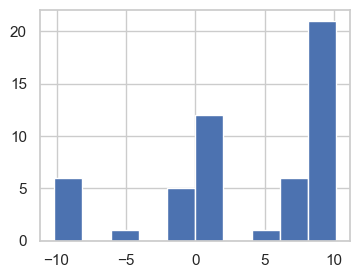

In [ ]:
tg1_last.bias_score.hist(figsize=(4, 3))

In [ ]:
text3_last.groupby('Group').bias_score.mean()

Group
CG              -0.108005
G1: Feedback     3.490375
G2: Rewritten    3.062512
Name: bias_score, dtype: float64

In [ ]:
text3_first.groupby('Group').bias_score.mean()

Group
CG              -0.108005
G1: Feedback     4.087038
G2: Rewritten    3.047249
Name: bias_score, dtype: float64

In [ ]:
# first text between two groups
mannwu(cg.bias_score.values, tg1_last.bias_score.values)

Mann-Whitney U statistic: 385.50, p-value is 0.0509041922
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
import numpy as np

def compute_cohens_d(group1, group2):
    # Convert the input lists to numpy arrays
    group1 = np.array(group1)
    group2 = np.array(group2)
    
    # Calculate the means of both groups
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    
    # Calculate the standard deviations of both groups
    std1 = np.std(group1, ddof=1)
    std2 = np.std(group2, ddof=1)
    
    # Calculate the pooled standard deviation
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
    
    # Calculate Cohen's d
    cohens_d = (mean1 - mean2) / pooled_std
    
    return cohens_d

# Example usage:
group1 = [2.3, 2.5, 2.8, 3.0, 3.2]
group2 = [3.1, 3.3, 3.5, 3.8, 4.0]

cohens_d = compute_cohens_d(group1, group2)
print(f"Cohen's d: {cohens_d}")


Cohen's d: -2.138793138717618


In [ ]:
compute_cohens_d(cg.bias_score.values, tg1_last.bias_score.values)

-0.5459466771255109

In [ ]:
compute_cohens_d(tg1_last.bias_score.values, cg.bias_score.values)

0.5459466771255109

In [ ]:
compute_cohens_d(cg.bias_score.values, tg2_last.bias_score.values)

-0.601057603152697

In [ ]:
# first text between two groups
mannwu(cg.bias_score.values, tg2_last.bias_score.values)

Mann-Whitney U statistic: 436.50, p-value is 0.0665354734
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
# first text between two groups
mannwu(first_text_g1.bias_score.values, first_text_g2.bias_score.values)

Mann-Whitney U statistic: 1638.50, p-value is 0.2589251163
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
# last text between two groups
mannwu(last_text_g1.bias_score.values, last_text_g2.bias_score.values)

Mann-Whitney U statistic: 1658.50, p-value is 0.2057138389
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
# within one group, first text and last text
mannwu(first_text_g1.bias_score.values, last_text_g1.bias_score.values)

Mann-Whitney U statistic: 1304.00, p-value is 0.8868083272
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
# within one group, first text and last text
mannwu(first_text_g2.bias_score.values, last_text_g2.bias_score.values)

Mann-Whitney U statistic: 1621.50, p-value is 0.8845292775
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
first_text.columns

Index(['surveyID', 'normalFeedback', 'time', 'text', 'Age', 'Gender',
       'Nationality', 'Education', 'text_clean', 'word_gender', 'word_dict',
       'total_words', 'total_unique_words', 'total_m_cooc', 'total_f_cooc',
       'bias_records', 'bias_score', 'Group', 'Content',
       'normalFeedback_clean'],
      dtype='object')

IndexError: list assignment index out of range

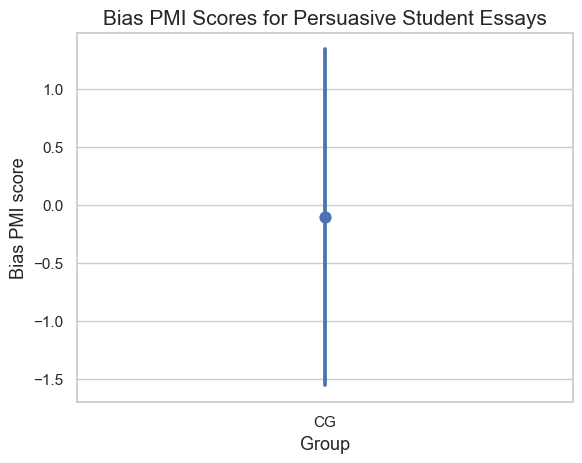

In [59]:
sns.pointplot(data=text3_first, x="Group", y="bias_score", errorbar='se')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Bias PMI Scores for Persuasive Student Essays', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'CG: Syntactical'
labels[1] = 'G1: Adaptive'
labels[2] = 'G2: Rewritten'
plt.gca().set_xticklabels(labels)

[Text(0, 0, 'CG: Syntactical'),
 Text(1, 0, 'G1: Adaptive'),
 Text(2, 0, 'G2: Rewritten')]

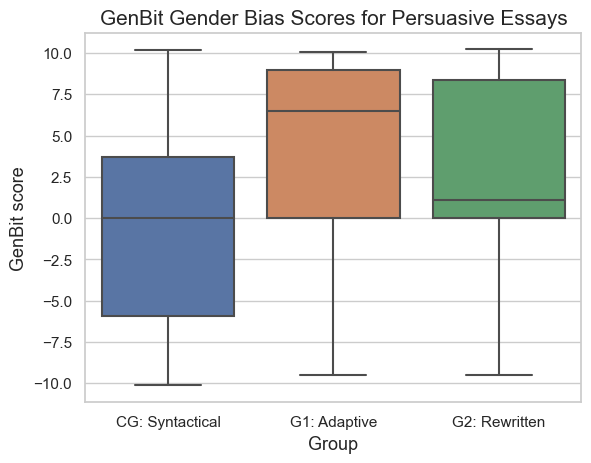

In [ ]:
sns.boxplot(data=text3_first, x="Group", y="bias_score")
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('GenBit Gender Bias Scores for Persuasive Essays', fontsize=15)
plt.ylabel('GenBit score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'CG: Syntactical'
labels[1] = 'G1: Adaptive'
labels[2] = 'G2: Rewritten'
plt.gca().set_xticklabels(labels)

In [61]:
text3_last

,surveyID,normalFeedback,time,text,Group,Age,Gender,Nationality,Nationality_other,Education,text_clean,word_gender,word_dict,total_words,total_unique_words,total_m_cooc,total_f_cooc,bias_records,bias_score
0,NaN,NaN,NaN,"Sehr geehrte Investoren, ich heiße Max Musterm...",CG,NaN,NaN,NaN,NaN,NaN,Sehr geehrte Investoren heiße Max Mustermann G...,"{'Sehr': {'m': 1e-06, 'f': 1e-06, 'female': []...","{'Sehr': 1, 'geehrte': 1, 'Investoren': 1, 'he...",221,180,0.000180,19.000180,"{'Sehr': {'m': 1e-06, 'f': 1e-06, 'female': []...",10.1816
1,NaN,NaN,NaN,"Sehr geehrte Investor*innen, wie viele von ihn...",CG,NaN,NaN,NaN,NaN,NaN,Sehr geehrte Investorinnen viele wahrscheinlic...,"{'Sehr': {'m': 1e-06, 'f': 1e-06, 'female': []...","{'Sehr': 1, 'geehrte': 1, 'Investorinnen': 1, ...",155,129,0.000129,19.000129,"{'Sehr': {'m': 1e-06, 'f': 1e-06, 'female': []...",9.8652
2,NaN,NaN,NaN,Erfolgreiches Lernen hängt nicht nur von gutem...,CG,NaN,NaN,NaN,NaN,NaN,Erfolgreiches Lernen hängt gutem Unterricht gu...,"{'Erfolgreiches': {'m': 1e-06, 'f': 1e-06, 'fe...","{'Erfolgreiches': 1, 'Lernen': 5, 'hängt': 1, ...",187,149,0.000149,151.000149,"{'Erfolgreiches': {'m': 1e-06, 'f': 1e-06, 'fe...",7.0630
3,NaN,NaN,NaN,Wenn Freunde und Bekannte aus dem Arbeitsumfel...,CG,NaN,NaN,NaN,NaN,NaN,Wenn Freunde Bekannte Arbeitsumfeld zugehen fr...,"{'Wenn': {'m': 1e-06, 'f': 1e-06, 'female': []...","{'Wenn': 1, 'Freunde': 1, 'Bekannte': 1, 'Arbe...",126,103,0.000103,95.000103,"{'Wenn': {'m': 1e-06, 'f': 1e-06, 'female': []...",3.6828
4,NaN,NaN,NaN,"Hallo, ich bin Lisa und die Gründerin des Star...",CG,NaN,NaN,NaN,NaN,NaN,Hallo Lisa Gründerin Start Ups Smart Ed Viele ...,"{'Hallo': {'m': 1e-06, 'f': 1e-06, 'female': [...","{'Hallo': 1, 'Lisa': 1, 'Gründerin': 2, 'Start...",181,141,0.000141,94.000141,"{'Hallo': {'m': 1e-06, 'f': 1e-06, 'female': [...",7.9691
5,NaN,NaN,NaN,In meiner App werden die Sinne des Lernenden v...,CG,NaN,NaN,NaN,NaN,NaN,In App Sinne Lernenden vermehrt angesprochen Z...,"{'In': {'m': 1e-06, 'f': 1e-06, 'female': [], ...","{'In': 2, 'App': 8, 'Sinne': 3, 'Lernenden': 1...",192,145,0.000145,0.000145,"{'In': {'m': 1e-06, 'f': 1e-06, 'female': [], ...",0.0000
6,NaN,NaN,NaN,Die Geschäftsmodellidee SmartEd basiert auf de...,CG,NaN,NaN,NaN,NaN,NaN,Die Geschäftsmodellidee SmartEd basiert Crowdw...,"{'Die': {'m': 1e-06, 'f': 1e-06, 'female': [],...","{'Die': 1, 'Geschäftsmodellidee': 1, 'SmartEd'...",171,124,38.000124,75.000124,"{'Die': {'m': 1e-06, 'f': 1e-06, 'female': [],...",-0.9922
7,NaN,NaN,NaN,Ich heiße Martina M. und bin Entwicklerin der ...,CG,NaN,NaN,NaN,NaN,NaN,Ich heiße Martina M Entwicklerin App Smart Ed ...,"{'Ich': {'m': 1e-06, 'f': 1e-06, 'female': [],...","{'Ich': 1, 'heiße': 1, 'Martina': 1, 'M': 1, '...",157,127,57.000127,95.000127,"{'Ich': {'m': 1e-06, 'f': 1e-06, 'female': [],...",-1.4400
8,NaN,NaN,NaN,Ich heiße Mounia Ezzadouy und bin CEO bei Smar...,CG,NaN,NaN,NaN,NaN,NaN,Ich heiße Mounia Ezzadouy CEO SmartED Wir biet...,"{'Ich': {'m': 1e-06, 'f': 1e-06, 'female': [],...","{'Ich': 1, 'heiße': 1, 'Mounia': 1, 'Ezzadouy'...",165,136,38.000136,0.000136,"{'Ich': {'m': 1e-06, 'f': 1e-06, 'female': [],...",-8.8729
9,NaN,NaN,NaN,"Wir sind smart Ed! ein junges, motiviertes Sta...",CG,NaN,NaN,NaN,NaN,NaN,Wir smart Ed junges motiviertes Startup Untern...,"{'Wir': {'m': 1e-06, 'f': 1e-06, 'female': [],...","{'Wir': 3, 'smart': 1, 'Ed': 1, 'junges': 1, '...",158,140,19.000140,0.000140,"{'Wir': {'m': 1e-06, 'f': 1e-06, 'female': [],...",-9.9431


IndexError: list assignment index out of range

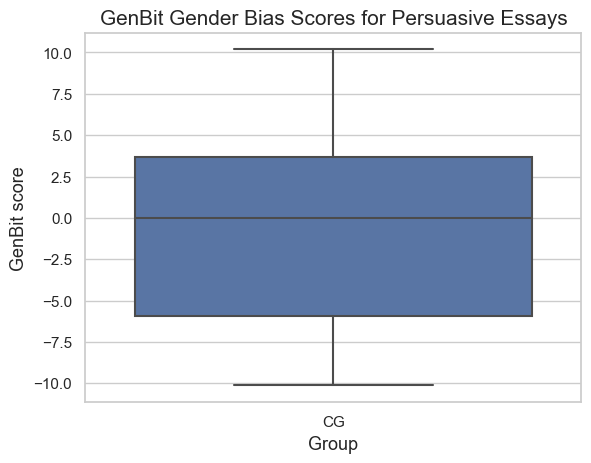

In [60]:
sns.boxplot(data=text3_last, x="Group", y="bias_score")
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('GenBit Gender Bias Scores for Persuasive Essays', fontsize=15)
plt.ylabel('GenBit score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'CG: Syntactical'
labels[1] = 'G1: Adaptive'
labels[2] = 'G2: Rewritten'
plt.gca().set_xticklabels(labels)

In [26]:
from scipy.stats import ttest_rel

ttest_rel(tg1_first.bias_score, tg1_last.bias_score)

TtestResult(statistic=0.5546274248303167, pvalue=0.5815738100477992, df=51)

In [27]:
ttest_rel(tg2_first.bias_score, tg2_last.bias_score)

TtestResult(statistic=-0.021183692514667462, pvalue=0.9831744235081381, df=56)

[Text(0, 0, 'G1: Open-ended'),
 Text(1, 0, 'G2: Rewritten'),
 Text(2, 0, 'G2: Rewritten')]

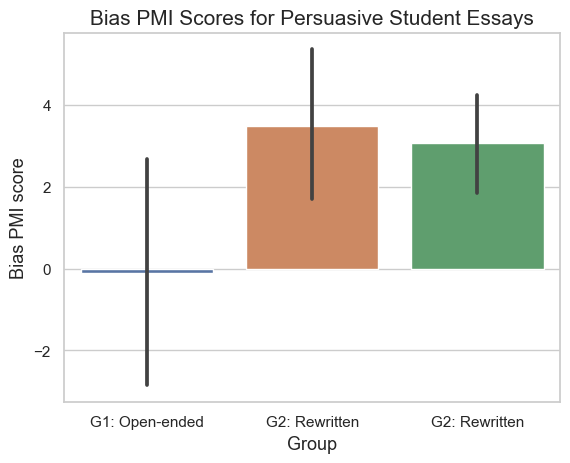

In [86]:
sns.barplot(data=text3, x="Group", y="bias_score")
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Bias PMI Scores for Persuasive Student Essays', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'CG: Syntactical'
labels[0] = 'G1: Open-ended'
labels[1] = 'G2: Rewritten'
plt.gca().set_xticklabels(labels)

[Text(0, 0, 'G1: Feedback'), Text(1, 0, 'G2: Rewritten')]

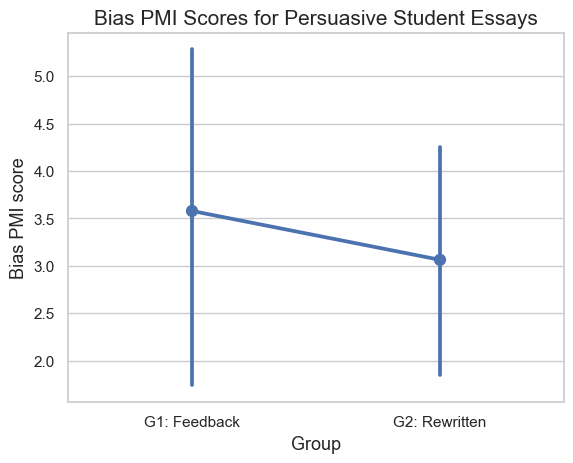

In [138]:
sns.pointplot(data=last_text, x="Group", y="bias_score", errorbar='ci')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Bias PMI Scores for Persuasive Student Essays', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'G1: Feedback'
labels[1] = 'G2: Rewritten'
plt.gca().set_xticklabels(labels)

[Text(0, 0, 'G1: Feedback'), Text(1, 0, 'G2: Rewritten')]

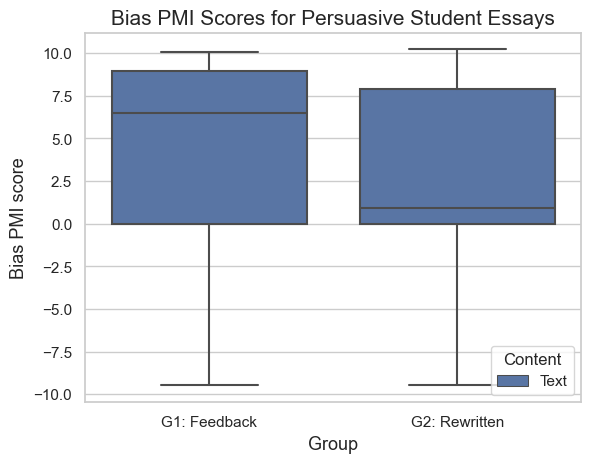

In [139]:
sns.boxplot(data=first_text, x="Group", y="bias_score", hue="Content")
plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Bias PMI Scores for Persuasive Student Essays', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'G1: Feedback'
labels[1] = 'G2: Rewritten'
plt.gca().set_xticklabels(labels)

## feedback

In [42]:
feedback.total_words.describe()

count    311.000000
mean     128.376206
std       55.818860
min       61.000000
25%       84.000000
50%      100.000000
75%      172.000000
max      336.000000
Name: total_words, dtype: float64

In [140]:
# for the same surveyID, select the earliest and latest time
first_feedback = processed_feedback.sort_values('time').drop_duplicates('surveyID', keep='first')
last_feedback = processed_feedback.sort_values('time').drop_duplicates('surveyID', keep='last')
first_feedback.shape, last_feedback.shape

((108, 20), (108, 20))

In [43]:
feedback_g1 = feedback[feedback.Group=='G1: Feedback']
feedback_g2 = feedback[feedback.Group=='G2: Rewritten']
feedback_g1.shape, feedback_g2.shape

((184, 18), (127, 18))

In [45]:
feedback_g1.total_words.mean(), feedback_g2.total_words.mean()

(90.3804347826087, 183.4251968503937)

In [46]:
feedback_g1.bias_score.mean(), feedback_g2.bias_score.mean()

(3.676049456521739, 3.5840409448818895)

(<Axes: >, <Axes: >)

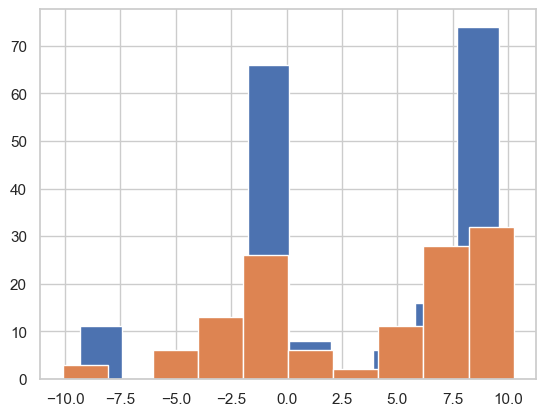

In [30]:
feedback_g1.bias_score.hist(), feedback_g2.bias_score.hist()

In [143]:
feedback_g1.bias_score.describe(), feedback_g2.bias_score.describe()

(count    184.000000
 mean       3.676049
 std        5.215761
 min       -9.303300
 25%        0.000000
 50%        5.486650
 75%        8.615900
 max        9.561400
 Name: bias_score, dtype: float64,
 count    127.000000
 mean       3.584041
 std        5.213504
 min      -10.100900
 25%       -0.391000
 50%        5.788700
 75%        8.168700
 max       10.243200
 Name: bias_score, dtype: float64)

In [31]:
check_gaussianity(feedback_g1.bias_score.values)

Shapiro-Wilk Test: Statistics=0.816, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=12.968, p=0.002
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.210, p=0.000
Sample does not look Gaussian (reject H0)


In [32]:
mannwu(feedback_g1.bias_score.values, feedback_g2.bias_score.values)

Mann-Whitney U statistic: 12598.50, p-value is 0.2376381283
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [ ]:
first_feedback_g1 = first_feedback[first_feedback.Group=='G1: Feedback']
last_feedback_g1 = last_feedback[last_feedback.Group=='G1: Feedback']
first_feedback_g2 = first_feedback[first_feedback.Group=='G2: Rewritten']
last_feedback_g2 = last_feedback[last_feedback.Group=='G2: Rewritten']
first_feedback_g1.shape, last_feedback_g1.shape, first_feedback_g2.shape, last_feedback_g2.shape

In [147]:
check_gaussianity(first_feedback_g1.bias_score.values)

Shapiro-Wilk Test: Statistics=0.824, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=6.829, p=0.033
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.191, p=0.039
Sample does not look Gaussian (reject H0)


<Axes: >

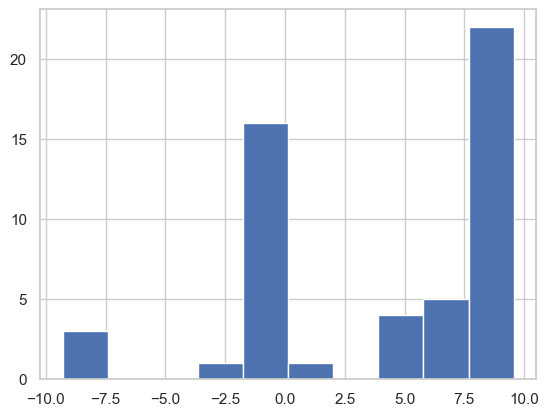

In [148]:
first_feedback_g1.bias_score.hist()

In [149]:
first_feedback.groupby('Group').bias_score.mean()

Group
G1: Feedback     4.138987
G2: Rewritten    2.877670
Name: bias_score, dtype: float64

In [150]:
last_feedback.groupby('Group').bias_score.mean()

Group
G1: Feedback     3.637067
G2: Rewritten    3.501591
Name: bias_score, dtype: float64

In [151]:
# first text between two groups
mannwu(first_feedback_g1.bias_score.values, first_feedback_g2.bias_score.values)

Mann-Whitney U statistic: 1695.00, p-value is 0.1414350487
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [152]:
# last text between two groups
mannwu(last_feedback_g1.bias_score.values, last_feedback_g2.bias_score.values)

Mann-Whitney U statistic: 1530.00, p-value is 0.6381485801
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [153]:
# within one group, first text and last text
mannwu(first_feedback_g1.bias_score.values, last_feedback_g1.bias_score.values)

Mann-Whitney U statistic: 1379.50, p-value is 0.7222068364
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [154]:
# within one group, first text and last text
mannwu(first_feedback_g2.bias_score.values, last_feedback_g2.bias_score.values)

Mann-Whitney U statistic: 1482.00, p-value is 0.5143762215
Fail to reject the null hypothesis. There is no significant difference in the distributions.


[Text(0, 0, 'TG1: Adaptive feedback'), Text(1, 0, 'TG2: Rewritten feedback')]

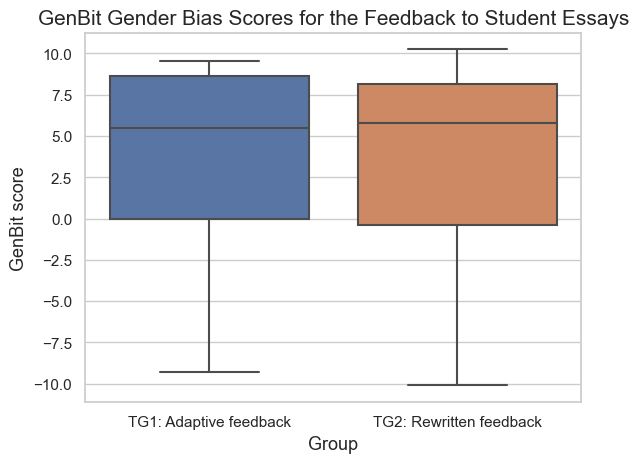

In [41]:
sns.boxplot(data=feedback, x="Group", y="bias_score")
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('GenBit Gender Bias Scores for the Feedback to Student Essays', fontsize=15)
plt.ylabel('GenBit score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'TG1: Adaptive feedback'
labels[1] = 'TG2: Rewritten feedback'
plt.gca().set_xticklabels(labels)

[Text(0, 0, 'G1: Feedback'), Text(1, 0, 'G2: Rewritten')]

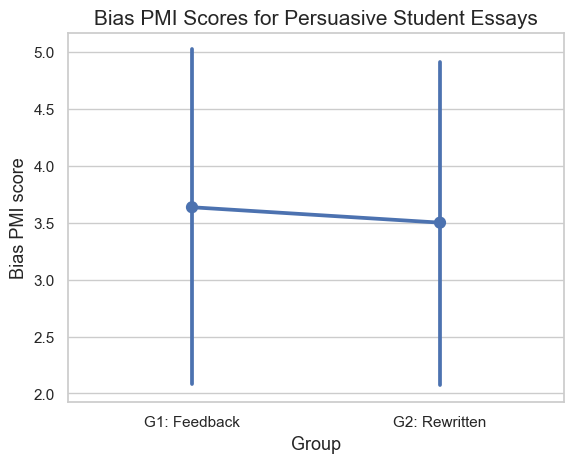

In [156]:
sns.pointplot(data=last_feedback, x="Group", y="bias_score", errorbar='ci')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Bias PMI Scores for Persuasive Student Essays', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'G1: Feedback'
labels[1] = 'G2: Rewritten'
plt.gca().set_xticklabels(labels)

## gender

In [157]:
first_text_g1_gender1 = first_text_g1[first_text_g1.Gender==1]
first_text_g1_gender2 = first_text_g1[first_text_g1.Gender==2]
last_text_g1_gender1 = last_text_g1[last_text_g1.Gender==1]
last_text_g1_gender2 = last_text_g1[last_text_g1.Gender==2]
first_text_g1_gender1.shape, first_text_g1_gender2.shape, last_text_g1_gender1.shape, last_text_g1_gender2.shape

((18, 20), (31, 20), (18, 20), (30, 20))

In [158]:
mannwu(first_text_g1_gender1.bias_score.values, first_text_g1_gender2.bias_score.values)

Mann-Whitney U statistic: 304.00, p-value is 0.6087342920
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [159]:
mannwu(first_text_g1_gender1.bias_score.values, last_text_g1_gender1.bias_score.values)

Mann-Whitney U statistic: 159.00, p-value is 0.9364477843
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [160]:
mannwu(first_text_g1_gender2.bias_score.values, last_text_g1_gender2.bias_score.values)

Mann-Whitney U statistic: 469.50, p-value is 0.9539025911
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [161]:
first_text_g2_gender1 = first_text_g2[first_text_g2.Gender==1]
first_text_g2_gender2 = first_text_g2[first_text_g2.Gender==2]
last_text_g2_gender1 = last_text_g2[last_text_g2.Gender==1]
last_text_g2_gender2 = last_text_g2[last_text_g2.Gender==2]
first_text_g2_gender1.shape, first_text_g2_gender2.shape, last_text_g2_gender1.shape, last_text_g2_gender2.shape

((29, 20), (26, 20), (29, 20), (27, 20))

In [162]:
mannwu(first_text_g2_gender1.bias_score.values, first_text_g2_gender2.bias_score.values)

Mann-Whitney U statistic: 423.00, p-value is 0.4383814620
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [163]:
mannwu(first_text_g2_gender1.bias_score.values, last_text_g2_gender1.bias_score.values)

Mann-Whitney U statistic: 458.00, p-value is 0.5554158165
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [164]:
mannwu(first_text_g2_gender2.bias_score.values, last_text_g2_gender2.bias_score.values)

Mann-Whitney U statistic: 332.50, p-value is 0.7476260523
Fail to reject the null hypothesis. There is no significant difference in the distributions.


# Similarity analysis

In [12]:
import pandas as pd
processed_full = pd.read_csv("../data/arg_write/gpt_full.csv")
processed_short = processed_full[['surveyID', 'time', 'text', 'Group', 'normalFeedback', 'text_clean', 'normalFeedback_clean', 'Age', 'Gender', 'Nationality', 'Education']]
processed_full.shape, processed_full.surveyID.nunique()

((622, 20), 108)

In [13]:
processed_text = processed_short[processed_short.text_clean.notna()]
processed_feedback = processed_short[processed_short.normalFeedback_clean.notna()]
processed_text.shape, processed_feedback.shape

((311, 11), (311, 11))

In [15]:
processed_text.groupby('Group').size()

Group
G1: Feedback     184
G2: Rewritten    127
dtype: int64

In [16]:
processed_feedback.groupby('Group').size()

Group
G1: Feedback     184
G2: Rewritten    127
dtype: int64

In [167]:
# for the same surveyID, select the earliest and latest time
first_text = processed_text.sort_values('time').drop_duplicates('surveyID', keep='first')
last_text = processed_text.sort_values('time').drop_duplicates('surveyID', keep='last')
first_text.shape, last_text.shape

((108, 11), (108, 11))

In [168]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def text_similarity(text1, text2):
    """
    Computes the cosine similarity between two texts.
    
    Parameters:
    text1 (str): The first text string.
    text2 (str): The second text string.
    
    Returns:
    float: Cosine similarity score between text1 and text2.
    """
    # Initialize the TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    # Convert the texts to TF-IDF vectors
    tfidf_matrix = vectorizer.fit_transform([text1, text2])

    # Calculate the Cosine Similarity
    cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

    return cosine_sim[0][0]

# Example usage
text1 = "Your first text goes here."
text2 = "Your second text goes here."
similarity_score = text_similarity(text1, text2)
print(f"Cosine Similarity: {similarity_score}")

Cosine Similarity: 0.6694188517266485


In [169]:
first_last_text = pd.merge(first_text, last_text, on=['surveyID', 'Age', 'Gender', 'Nationality', 'Education', 'Group'], suffixes=('_first', '_last'))
first_last_text['first_last_tfidf'] = first_last_text.apply(lambda x: text_similarity(x.text_clean_first, x.text_clean_last), axis=1)

In [170]:
first_last_text.groupby('Group').first_last_tfidf.mean()

Group
G1: Feedback     0.663101
G2: Rewritten    0.727691
Name: first_last_tfidf, dtype: float64

In [171]:
first_last_text_g1 = first_last_text[first_last_text.Group=='G1: Feedback']
first_last_text_g2 = first_last_text[first_last_text.Group=='G2: Rewritten']
first_last_text_g1.shape, first_last_text_g2.shape

((51, 17), (56, 17))

In [172]:
check_gaussianity(first_last_text.first_last_tfidf.values)

Shapiro-Wilk Test: Statistics=0.814, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=33.557, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.236, p=0.000
Sample does not look Gaussian (reject H0)


In [173]:
mannwu(first_last_text_g1.first_last_tfidf.values, first_last_text_g2.first_last_tfidf.values)

Mann-Whitney U statistic: 1162.50, p-value is 0.0979910715
Fail to reject the null hypothesis. There is no significant difference in the distributions.


In [174]:
mannwu(first_last_text_g1[first_last_text_g1.Gender==1].first_last_tfidf.values, first_last_text_g1[first_last_text_g1.Gender==2].first_last_tfidf.values)

Mann-Whitney U statistic: 278.50, p-value is 0.8646923604
Fail to reject the null hypothesis. There is no significant difference in the distributions.


# Total words

In [175]:
processed_full.groupby(['Group', 'Gender'])[['total_words', 'total_unique_words']].mean()

total_words  total_unique_words
Group         Gender                                 
G1: Feedback  1        119.519231           97.605769
              2        117.764463           95.376033
              3        102.375000           89.125000
              4         87.714286           70.857143
G2: Rewritten 1        146.492857          112.221429
              2        152.660714          121.964286
              4        251.500000          178.000000

In [189]:
processed_full.groupby(['Group', 'Gender']).count()

surveyID  normalFeedback  time  text  Age  Nationality  \
Group         Gender                                                           
G1: Feedback  1            104             104   104   104  104          104   
              2            242             242   242   242  242          242   
              3              8               8     8     8    8            8   
              4             14              14    14    14   14           14   
G2: Rewritten 1            140             140   140   140  140          140   
              2            112             112   112   112  112          112   
              4              2               2     2     2    2            2   

                      Education  text_clean  word_gender  word_dict  \
Group         Gender                                                  
G1: Feedback  1             104          52          104        104   
              2             242         121          242        242   
              3               8           4            8          8   
              4              14           7           14         14   
G2: Rewritten 1             140          70          140        140   
              2             112          56          112        112   
              4               2           1            2          2   

                      total_words  total_unique_words  total_m_cooc  \
Group         Gender                                                  
G1: Feedback  1               104                 104           104   
              2               242                 242           242   
              3                 8                   8             8   
              4                14                  14            14   
G2: Rewritten 1               140                 140           140   
              2               112                 112           112   
              4                 2                   2             2   

                      total_f_cooc  bias_records  bias_score  Content  \
Group         Gender                                                    
G1: Feedback  1                104           104         104      104   
              2                242           242         242      242   
              3                  8             8           8        8   
              4                 14            14          14       14   
G2: Rewritten 1                140           140         140      140   
              2                112           112         112      112   
              4                  2             2           2        2   

                      normalFeedback_clean  
Group         Gender                        
G1: Feedback  1                         52  
              2                        121  
              3                          4  
              4                          7  
G2: Rewritten 1                         70  
              2                         56  
              4                          1

In [190]:
processed_full.groupby(['Group', 'Nationality']).count()

surveyID  normalFeedback  time  text  Age  Gender  \
Group         Nationality                                                      
G1: Feedback  2                 316             316   316   316  316     316   
              4                  10              10    10    10   10      10   
              6                  42              42    42    42   42      42   
G2: Rewritten 2                 216             216   216   216  216     216   
              6                  38              38    38    38   38      38   

                           Education  text_clean  word_gender  word_dict  \
Group         Nationality                                                  
G1: Feedback  2                  316         158          316        316   
              4                   10           5           10         10   
              6                   42          21           42         42   
G2: Rewritten 2                  216         108          216        216   
              6                   38          19           38         38   

                           total_words  total_unique_words  total_m_cooc  \
Group         Nationality                                                  
G1: Feedback  2                    316                 316           316   
              4                     10                  10            10   
              6                     42                  42            42   
G2: Rewritten 2                    216                 216           216   
              6                     38                  38            38   

                           total_f_cooc  bias_records  bias_score  Content  \
Group         Nationality                                                    
G1: Feedback  2                     316           316         316      316   
              4                      10            10          10       10   
              6                      42            42          42       42   
G2: Rewritten 2                     216           216         216      216   
              6                      38            38          38       38   

                           normalFeedback_clean  
Group         Nationality                        
G1: Feedback  2                             158  
              4                               5  
              6                              21  
G2: Rewritten 2                             108  
              6                              19

In [91]:
processed_full.groupby(['Group', 'Education']).count()

surveyID  normalFeedback  time  text  Age  Gender  \
Group         Education                                                      
G1: Feedback  3               358             358   358   358  358     358   
              4                10              10    10    10   10      10   
G2: Rewritten 3               224             224   224   224  224     224   
              4                30              30    30    30   30      30   

                         Nationality  text_clean  word_gender  word_dict  \
Group         Education                                                    
G1: Feedback  3                  358         179          358        358   
              4                   10           5           10         10   
G2: Rewritten 3                  224         112          224        224   
              4                   30          15           30         30   

                         total_words  total_unique_words  total_m_cooc  \
Group         Education                                                  
G1: Feedback  3                  358                 358           358   
              4                   10                  10            10   
G2: Rewritten 3                  224                 224           224   
              4                   30                  30            30   

                         total_f_cooc  bias_records  bias_score  Content  \
Group         Education                                                    
G1: Feedback  3                   358           358         358      358   
              4                    10            10          10       10   
G2: Rewritten 3                   224           224         224      224   
              4                    30            30          30       30   

                         normalFeedback_clean  
Group         Education                        
G1: Feedback  3                           179  
              4                             5  
G2: Rewritten 3                           112  
              4                            15

In [31]:
processed_g1 = processed_full[processed_full.Group=='G1: Feedback']
processed_g2 = processed_full[processed_full.Group=='G2: Rewritten']
processed_g1_text = processed_g1[processed_g1.text_clean.notna()]
processed_g2_text = processed_g2[processed_g2.text_clean.notna()]
processed_full.shape, processed_g1.shape, processed_g2.shape, processed_g1_text.shape, processed_g2_text.shape

((622, 20), (368, 20), (254, 20), (184, 20), (127, 20))

In [24]:
processed_text = processed_full[processed_full.text_clean.notna()]
processed_feedback = processed_full[processed_full.normalFeedback_clean.notna()]

In [32]:
processed_text_first = processed_text.sort_values('time').drop_duplicates('surveyID', keep='first')
processed_text_last = processed_text.sort_values('time').drop_duplicates('surveyID', keep='last')

In [83]:
processed_text_first.time.mean(), processed_text_last.time.mean()

(1692219202.4854467, 1692378950.2248883)

In [33]:
processed_text_first.groupby(['Group', 'Gender']).total_words.mean()   

Group          Gender
G1: Feedback   1         118.333333
               2         122.774194
               3          51.000000
               4          64.500000
G2: Rewritten  1         126.793103
               2         126.115385
               4         167.000000
Name: total_words, dtype: float64

In [34]:
processed_text_last.groupby(['Group', 'Gender']).total_words.mean()   

Group          Gender
G1: Feedback   1         173.166667
               2         169.366667
               3         160.000000
               4         110.000000
G2: Rewritten  1         132.965517
               2         138.925926
               4         167.000000
Name: total_words, dtype: float64

In [29]:
processed_text.groupby(['Group', 'Gender']).total_words.mean()    

Group          Gender
G1: Feedback   1         151.000000
               2         144.479339
               3         116.750000
               4          77.857143
G2: Rewritten  1         111.671429
               2         121.982143
               4         167.000000
Name: total_words, dtype: float64

### word counts for first and last texts

In [86]:
check_gaussianity(processed_text_first.total_words.values), check_gaussianity(processed_text_last.total_words.values)

Shapiro-Wilk Test: Statistics=0.953, p=0.001
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=3.581, p=0.167
Sample looks Gaussian (fail to reject H0)
Kolmogorov-Smirnov Test: Statistics=0.097, p=0.249
Sample looks Gaussian (fail to reject H0)
Shapiro-Wilk Test: Statistics=0.948, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=2.124, p=0.346
Sample looks Gaussian (fail to reject H0)
Kolmogorov-Smirnov Test: Statistics=0.119, p=0.088
Sample looks Gaussian (fail to reject H0)


(None, None)

In [88]:
# originally no difference for the total words between two groups
two_sample_ttest(processed_text_first[processed_text_first.Group=='G1: Feedback'].total_words.values, processed_text_first[processed_text_first.Group=='G2: Rewritten'].total_words.values)

Do not reject the null hypothesis - suggest the sample means are similar


(-0.654526628893971, 0.5141902671491743)

In [89]:
# total words
two_sample_ttest(processed_text_last[processed_text_last.Group=='G1: Feedback'].total_words.values, processed_text_last[processed_text_last.Group=='G2: Rewritten'].total_words.values)

Reject the null hypothesis - suggest the sample means are different


(2.4777694971482997, 0.014799519118834972)

In [90]:
# total unique words
two_sample_ttest(processed_text_last[processed_text_last.Group=='G1: Feedback'].total_unique_words.values, processed_text_last[processed_text_last.Group=='G2: Rewritten'].total_unique_words.values)

Reject the null hypothesis - suggest the sample means are different


(2.66957633073423, 0.00878997388012836)

In [92]:
processed_text_last.groupby('Group')[['total_words', 'total_unique_words']].mean()

,total_words,total_unique_words
Group,,
G1: Feedback,168.196078,136.705882
G2: Rewritten,136.385965,110.666667


[Text(0, 0, 'G1: Feedback'), Text(1, 0, 'G2: Rewritten')]

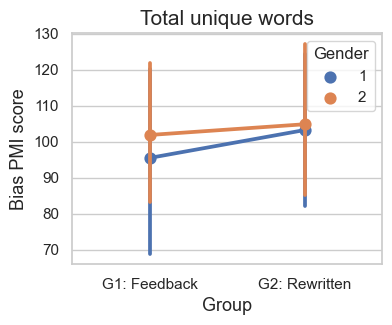

In [42]:
sns.pointplot(data=processed_text_first[(processed_text_first.Gender==1) |  (processed_text_first.Gender==2)], x="Group", y="total_unique_words", errorbar='ci', hue='Gender')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Total unique words', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'G1: Feedback'
labels[1] = 'G2: Rewritten'
# change figure size
plt.gcf().set_size_inches(4, 3)
plt.gca().set_xticklabels(labels)

[Text(0, 0, 'G1: Feedback'), Text(1, 0, 'G2: Rewritten')]

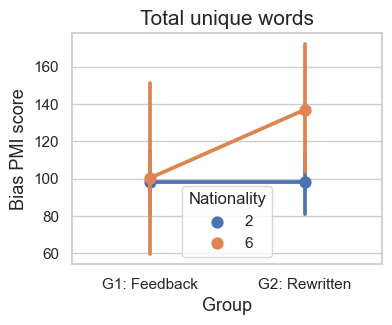

In [45]:
sns.pointplot(data=processed_text_first[(processed_text_first.Nationality==2) |  (processed_text_first.Nationality==6)], x="Group", y="total_unique_words", errorbar='ci', hue='Nationality')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Total unique words', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'G1: Feedback'
labels[1] = 'G2: Rewritten'
# change figure size
plt.gcf().set_size_inches(4, 3)
plt.gca().set_xticklabels(labels)

In [46]:
mannwu(processed_text_first[(processed_text_first.Group=='G1: Feedback') & (processed_text_first.Nationality==2)].total_words.values, processed_text_first[(processed_text_first.Group=='G2: Rewritten') & (processed_text_first.Nationality==6)].total_words.values)

Mann-Whitney U statistic: 149.00, p-value is 0.1665846020
Fail to reject the null hypothesis. There is no significant difference in the distributions.


[Text(0, 0, 'G1: Feedback'), Text(1, 0, 'G2: Rewritten')]

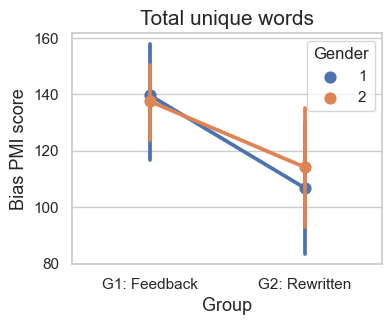

In [44]:
sns.pointplot(data=processed_text_last[(processed_text_last.Gender==1) |  (processed_text_last.Gender==2)], x="Group", y="total_unique_words", errorbar='ci', hue='Gender')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Total unique words', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'G1: Feedback'
labels[1] = 'G2: Rewritten'
plt.gcf().set_size_inches(4, 3)
plt.gca().set_xticklabels(labels)

[Text(0, 0, 'G1: Feedback'), Text(1, 0, 'G2: Rewritten')]

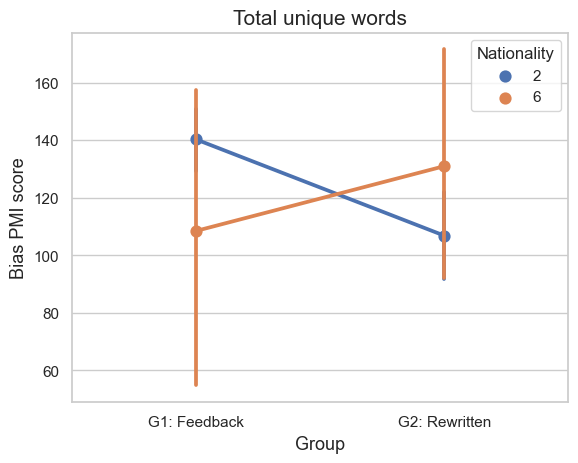

In [39]:
sns.pointplot(data=processed_text_last[(processed_text_last.Nationality==2) |  (processed_text_last.Nationality==6)], x="Group", y="total_unique_words", errorbar='ci', hue='Nationality')
# plt.legend(title='Content', loc='lower right')
# set y-axis label
# set title
plt.title('Total unique words', fontsize=15)
plt.ylabel('Bias PMI score', fontsize=13)
plt.xlabel('Group', fontsize=13)
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
labels[0] = 'G1: Feedback'
labels[1] = 'G2: Rewritten'
plt.gca().set_xticklabels(labels)

In [47]:
processed_feedback_g2 = processed_feedback[processed_feedback.Group=='G2: Rewritten']
processed_feedback_g2.shape

(127, 20)

In [51]:
processed_feedback_g2.total_words.mean()

183.4251968503937

In [48]:
processed_text.groupby('Group').total_words.mean()

Group
G1: Feedback     143.184783
G2: Rewritten    116.653543
Name: total_words, dtype: float64

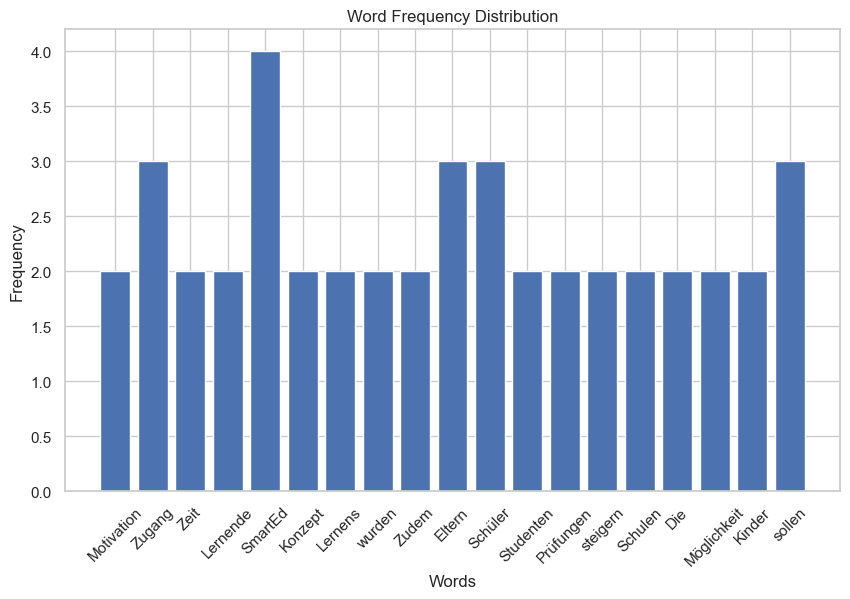

In [203]:
import matplotlib.pyplot as plt
from collections import Counter
import re
import ast
from collections import Counter

def plot_word_frequency(word_dict):
    # Clean and tokenize the text
    # words = re.findall(r'\w+', text.lower())
    # word_counts = Counter(words)
    
    # # Get the most common words
    # common_words = word_counts.most_common(20)
    # print(word_counts)
    # Plot the word frequency
    word_counter = Counter(word_dict)
    filtered_counter = Counter({word: count for word, count in word_counter.items() if count > 1})
    words, counts = zip(*filtered_counter.items())
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequency Distribution')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
text = "Your text goes here. Add more text to see the diversity."
plot_word_frequency(ast.literal_eval(processed_full.word_dict[0]))

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_visualization(texts):
    # Convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Adjust perplexity to be less than the number of samples
    perplexity = min(30, len(texts) - 1)
    
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    for i, text in enumerate(texts):
        plt.annotate(f'Text {i+1}', (tsne_results[i, 0], tsne_results[i, 1]))
    plt.title('t-SNE Visualization of Texts')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Example usage
texts = processed_g1.text_clean.tolist()
tsne_visualization(texts)

ValueError: np.nan is an invalid document, expected byte or unicode string.

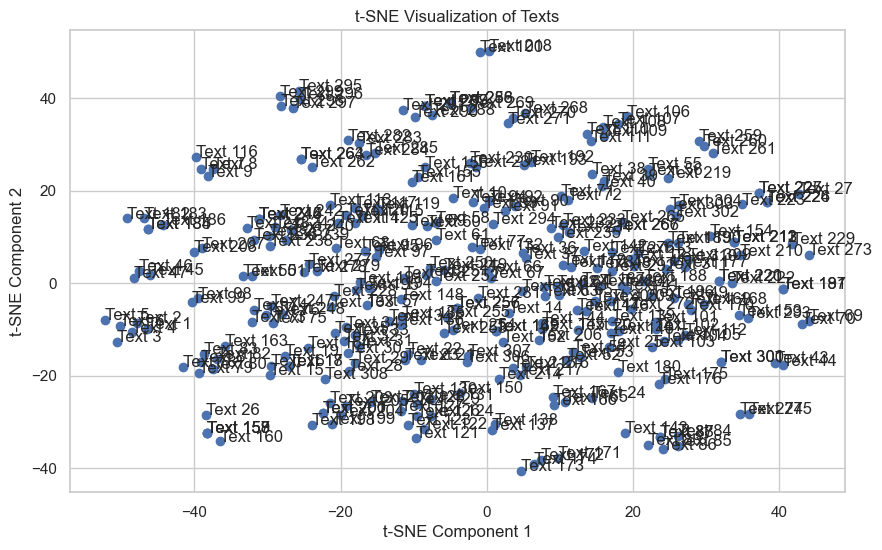

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_visualization(texts):
    # Convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Adjust perplexity to be less than the number of samples
    perplexity = min(30, len(texts) - 1)
    
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    for i, text in enumerate(texts):
        plt.annotate(f'Text {i+1}', (tsne_results[i, 0], tsne_results[i, 1]))
    plt.title('t-SNE Visualization of Texts')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Example usage
texts = processed_text.text_clean.tolist()
tsne_visualization(texts)

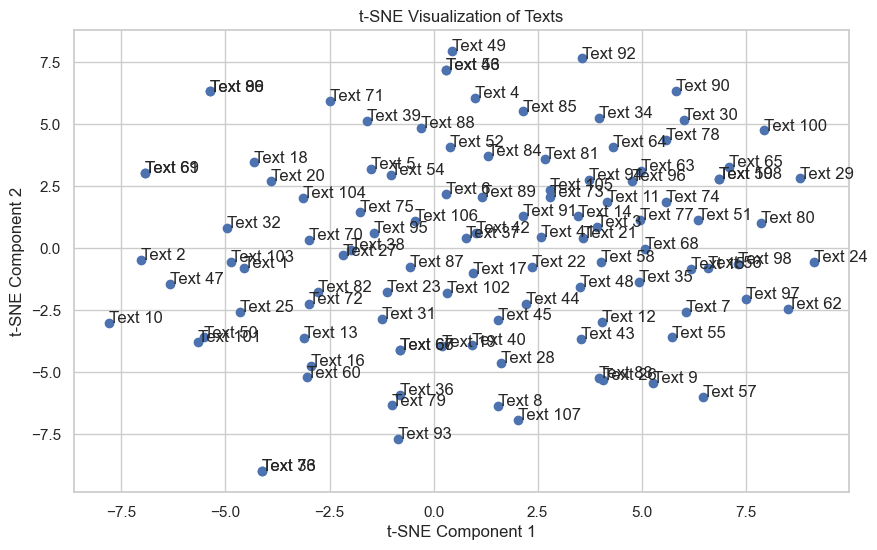

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_visualization(texts):
    # Convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Adjust perplexity to be less than the number of samples
    perplexity = min(30, len(texts) - 1)
    
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    for i, text in enumerate(texts):
        plt.annotate(f'Text {i+1}', (tsne_results[i, 0], tsne_results[i, 1]))
    plt.title('t-SNE Visualization of Texts')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Example usage
texts = processed_text_first.text_clean.tolist()
tsne_visualization(texts)

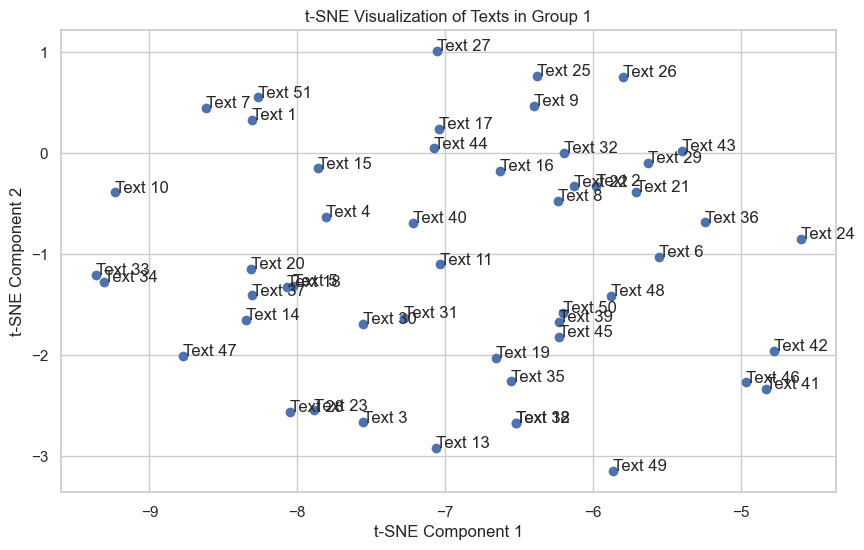

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_visualization(texts):
    # Convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Adjust perplexity to be less than the number of samples
    perplexity = min(30, len(texts) - 1)
    
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    for i, text in enumerate(texts):
        plt.annotate(f'Text {i+1}', (tsne_results[i, 0], tsne_results[i, 1]))
    plt.title('t-SNE Visualization of Texts in Group 1')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Example usage
texts = processed_text_last[processed_text_last.Group=='G1: Feedback'].text_clean.tolist()
tsne_visualization(texts)

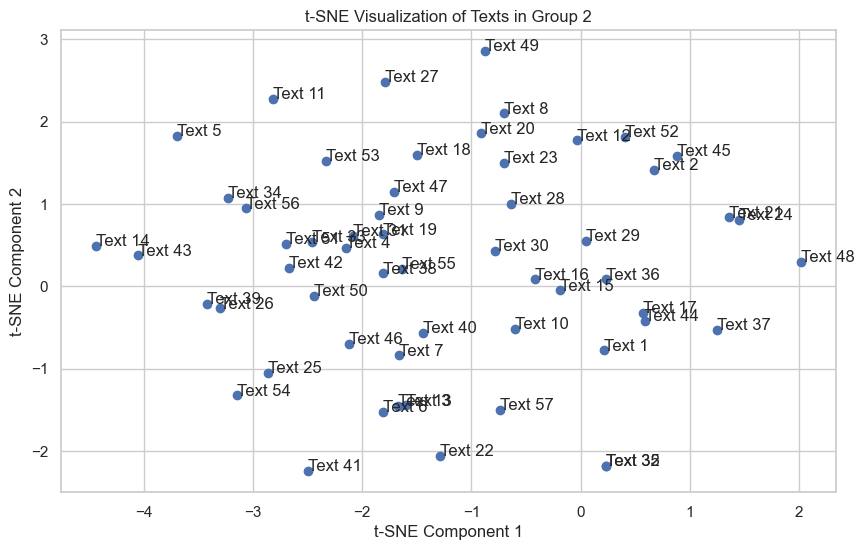

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_visualization(texts):
    # Convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Adjust perplexity to be less than the number of samples
    perplexity = min(30, len(texts) - 1)
    
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    for i, text in enumerate(texts):
        plt.annotate(f'Text {i+1}', (tsne_results[i, 0], tsne_results[i, 1]))
    plt.title('t-SNE Visualization of Texts in Group 2')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Example usage
texts = processed_text_last[processed_text_last.Group=='G2: Rewritten'].text_clean.tolist()
tsne_visualization(texts)

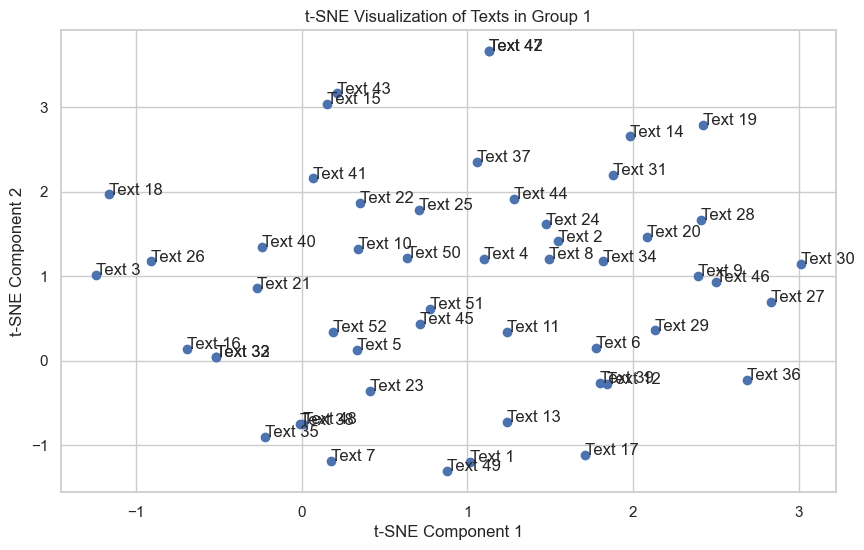

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_visualization(texts):
    # Convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Adjust perplexity to be less than the number of samples
    perplexity = min(30, len(texts) - 1)
    
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    for i, text in enumerate(texts):
        plt.annotate(f'Text {i+1}', (tsne_results[i, 0], tsne_results[i, 1]))
    plt.title('t-SNE Visualization of Texts in Group 1')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Example usage
texts = processed_text_first[processed_text_first.Group=='G1: Feedback'].text_clean.tolist()
tsne_visualization(texts)

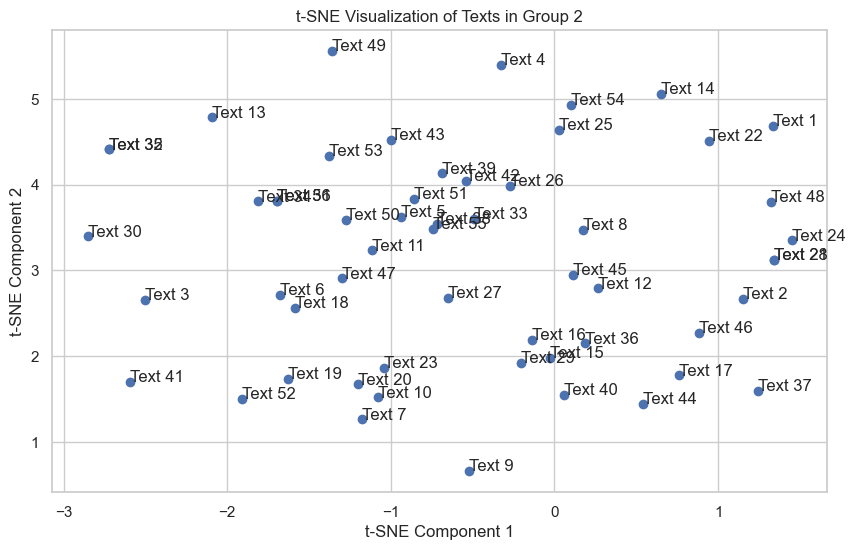

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_visualization(texts):
    # Convert texts to TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Adjust perplexity to be less than the number of samples
    perplexity = min(30, len(texts) - 1)
    
    # Apply t-SNE to reduce dimensionality
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(tfidf_matrix.toarray())
    
    # Plot the t-SNE results
    plt.figure(figsize=(10, 6))
    plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
    for i, text in enumerate(texts):
        plt.annotate(f'Text {i+1}', (tsne_results[i, 0], tsne_results[i, 1]))
    plt.title('t-SNE Visualization of Texts in Group 2')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

# Example usage
texts = processed_text_first[processed_text_first.Group=='G2: Rewritten'].text_clean.tolist()
tsne_visualization(texts)

In [74]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_variance(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts).toarray()
    variance = np.var(tfidf_matrix, axis=0).mean()
    return variance

# Example usage
texts_group1 = processed_text_last[processed_text_last.Group=='G1: Feedback'].text_clean.tolist()
texts_group2 = processed_text_last[processed_text_last.Group=='G2: Rewritten'].text_clean.tolist()

variance_group1 = calculate_variance(texts_group1)
variance_group2 = calculate_variance(texts_group2)

print(f"Variance for Group 1: {variance_group1}")
print(f"Variance for Group 2: {variance_group2}")

Variance for Group 1: 0.000294265226710755
Variance for Group 2: 0.0003302020706329631


In [75]:
from collections import Counter
from scipy.stats import entropy

def calculate_entropy(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts).toarray()
    word_freq = np.sum(tfidf_matrix, axis=0)
    word_prob = word_freq / np.sum(word_freq)
    return entropy(word_prob)

# Example usage
entropy_group1 = calculate_entropy(texts_group1)
entropy_group2 = calculate_entropy(texts_group2)

print(f"Entropy for Group 1: {entropy_group1}")
print(f"Entropy for Group 2: {entropy_group2}")

Entropy for Group 1: 7.629602386198471
Entropy for Group 2: 7.4911731058678495


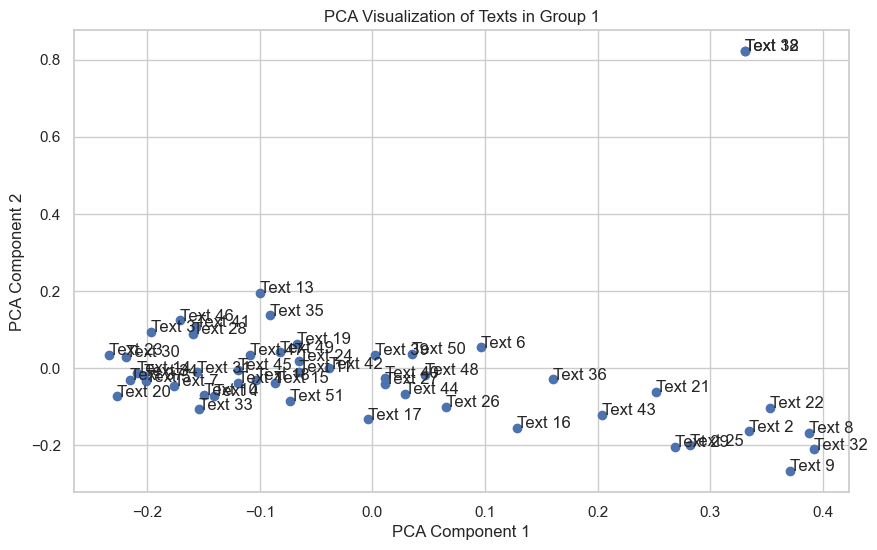

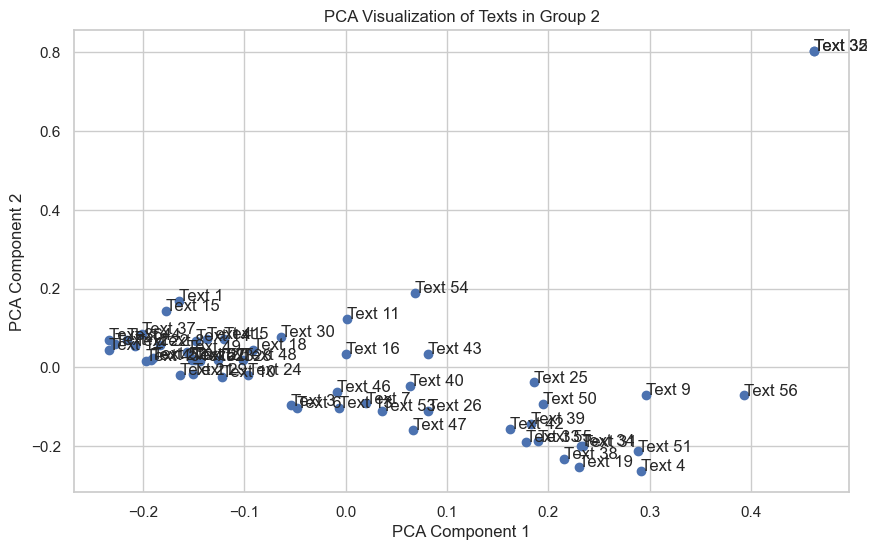

In [76]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca_visualization(texts, title):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(tfidf_matrix.toarray())
    
    plt.figure(figsize=(10, 6))
    plt.scatter(pca_results[:, 0], pca_results[:, 1])
    for i, text in enumerate(texts):
        plt.annotate(f'Text {i+1}', (pca_results[i, 0], pca_results[i, 1]))
    plt.title(f'PCA Visualization of Texts in {title}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.show()

# Example usage
pca_visualization(texts_group1, "Group 1")
pca_visualization(texts_group2, "Group 2")

In [77]:
from sklearn.cluster import KMeans

def clustering_analysis(texts, n_clusters=5):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(tfidf_matrix)
    cluster_labels = kmeans.labels_
    cluster_counts = Counter(cluster_labels)
    return cluster_counts

# Example usage
clusters_group1 = clustering_analysis(texts_group1)
clusters_group2 = clustering_analysis(texts_group2)

print(f"Cluster distribution for Group 1: {clusters_group1}")
print(f"Cluster distribution for Group 2: {clusters_group2}")

Cluster distribution for Group 1: Counter({1: 17, 2: 16, 0: 8, 3: 7, 4: 3})
Cluster distribution for Group 2: Counter({1: 23, 2: 20, 3: 10, 0: 3, 4: 1})


/Users/su/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Group 1 vs Group 2:
Diversity: Group 1 shows more diversity in terms of clustering as it has a more even distribution across five clusters. Even the smallest clusters (0, 3, and 4) have a notable number of texts.
Homogeneity: Group 2 is more homogeneous, with a heavy concentration in clusters 1 and 2. Clusters 0 and 4 have very few texts, indicating less diversity.
Conclusion
Group 1: Exhibits greater diversity as texts are more evenly distributed across multiple clusters. The presence of several smaller clusters indicates that there are distinct subgroups within the text data.
Group 2: Shows less diversity with a higher concentration of texts in a few clusters. The large sizes of clusters 1 and 2, combined with very small clusters 0 and 4, suggest that texts in Group 2 are more similar to each other compared to those in Group 1.

In [78]:
def lexical_diversity(text):
    words = text.split()
    unique_words = set(words)
    return len(unique_words) / len(words)

# Example usage
lexical_diversities_group1 = [lexical_diversity(text) for text in texts_group1]
lexical_diversities_group2 = [lexical_diversity(text) for text in texts_group2]

print(f"Lexical diversity for Group 1: {np.mean(lexical_diversities_group1)}")
print(f"Lexical diversity for Group 2: {np.mean(lexical_diversities_group2)}")

Lexical diversity for Group 1: 0.8233133485018607
Lexical diversity for Group 2: 0.84424464967118


In [79]:
def shannon_diversity_index(text):
    words = text.split()
    word_counts = Counter(words)
    total_words = len(words)
    proportions = [count / total_words for count in word_counts.values()]
    return -sum(p * np.log(p) for p in proportions)

# Example usage
shannon_index_group1 = [shannon_diversity_index(text) for text in texts_group1]
shannon_index_group2 = [shannon_diversity_index(text) for text in texts_group2]

print(f"Shannon Diversity Index for Group 1: {np.mean(shannon_index_group1)}")
print(f"Shannon Diversity Index for Group 2: {np.mean(shannon_index_group2)}")

Shannon Diversity Index for Group 1: 4.7374203044140994
Shannon Diversity Index for Group 2: 4.403507375155538


In [81]:
check_gaussianity(shannon_index_group1)

Shapiro-Wilk Test: Statistics=0.691, p=0.000
Sample does not look Gaussian (reject H0)
D'Agostino's K^2 Test: Statistics=44.431, p=0.000
Sample does not look Gaussian (reject H0)
Kolmogorov-Smirnov Test: Statistics=0.232, p=0.007
Sample does not look Gaussian (reject H0)


In [82]:
mannwu(shannon_index_group1, shannon_index_group2)

Mann-Whitney U statistic: 1899.50, p-value is 0.0061138892
Reject the null hypothesis. There is a significant difference in the distributions.
